In [1]:
from __future__ import print_function, division
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches


import os, sys
import numpy as np
import pandas as pd
import os, shutil, glob
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'figure.dpi': 400})
 
from IPython.display import HTML

HTML("<style>.container { width:80% !important; }</style>")


In [2]:
log_dir = '/home/minhduc/workspace/amromics/panta/paper_data/'
def flag_positive(flag):
    return (flag & 16) != 0
flag_positive(0)

False

In [3]:
from collections import defaultdict
genes = defaultdict(list)
with open('pasa/spades.gff') as fh:
    for line in fh:
        toks = line.strip().split('\t')
        if len(toks ) < 9:
            continue
        if toks[2] != 'CDS':
            continue
        contig = toks[0]
        start = int(toks[3])
        end = int(toks[4])
        if toks[6] == '-':
            start,end = end,start
        
        name = ''
        toks = toks[8].split(';')
        for tok in toks:
            if tok.startswith('Name='):
                name = tok[5:]
            if tok.startswith('product='):
                if name == '':
                    name = tok[8:].split()[0]        
        
        genes[contig].append((start, end, name))            


In [4]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [5]:
pos_info = """
#NODE_15_length_103790_cov_43.203486 16 NZ_CP006659.2 2193040 60 103790M #17becf
NODE_73_length_820_cov_541.971140 16 NZ_CP006659.2 2296704 0 820M #1f77b4
#NODE_109_length_255_cov_268.406250 0 NZ_CP006659.2 2297072 0 255M #7f7f7f 
NODE_63_length_1258_cov_43.058355 16 NZ_CP006659.2 2297399 60 1258M #ff7f0e
NODE_60_length_1322_cov_87.380753 256 NZ_CP006659.2 2298530 0 1322M #2ca02c
NODE_132_length_253_cov_46.182540 0 NZ_CP006659.2 2299725 60 253M #d62728
NODE_72_length_876_cov_41.348465 0 NZ_CP006659.2 2300022 60 876M #9467bd
NODE_78_length_693_cov_102.128975 272 NZ_CP006659.2 2300771 0 693M #8c564b
NODE_131_length_253_cov_53.730159 0 NZ_CP006659.2 2301706 60 253M #e377c2
NODE_73_length_820_cov_541.971140 256 NZ_CP006659.2 2301833 0 820M #1f77b4
#NODE_109_length_255_cov_268.406250 272 NZ_CP006659.2 2302030 0 255M #7f7f7f
NODE_58_length_1720_cov_47.744507 16 NZ_CP006659.2 2302528 60 1720M #bcbd22
NODE_57_length_1892_cov_465.464023 272 NZ_CP006659.2 2304164 0 1892M #17becf
#NODE_22_length_76199_cov_45.231807 16 NZ_CP006659.2 2305932 60 76199M #1f77b4
"""

pos_info2 = """
#NODE_125_length_255_cov_18.984375 0 NODE_89_length_342_cov_160.818605 3075216 60 255M
NODE_59_length_1559_cov_148.421089 16 NODE_89_length_342_cov_160.818605 3082795 0 1559M
NODE_45_length_4111_cov_45.848394 272 NODE_89_length_342_cov_160.818605 3084354 0 4111M
NODE_132_length_253_cov_46.182540 16 NODE_89_length_342_cov_160.818605 3088213 0 125M1I127M
NODE_60_length_1322_cov_87.380753 272 NODE_89_length_342_cov_160.818605 3088465 0 1322M
NODE_63_length_1258_cov_43.058355 0 NODE_89_length_342_cov_160.818605 3089787 60 1258M
NODE_73_length_820_cov_541.971140 256 NODE_89_length_342_cov_160.818605 3091045 0 820M
#NODE_109_length_255_cov_268.406250 272 NODE_89_length_342_cov_160.818605 3091242 0 255M
#NODE_40_length_6274_cov_49.823491 0 NODE_89_length_342_cov_160.818605 3091865 60 6274M
#NODE_73_length_820_cov_541.971140 272 NODE_89_length_342_cov_160.818605 3098139 0 820M
#NODE_109_length_255_cov_268.406250 256 NODE_89_length_342_cov_160.818605 3098507 0 255M
#NODE_49_length_2850_cov_52.312156 0 NODE_89_length_342_cov_160.818605 3098959 60 2850M
#NODE_73_length_820_cov_541.971140 16 NODE_89_length_342_cov_160.818605 3101809 0 820M
#NODE_109_length_255_cov_268.406250 256 NODE_89_length_342_cov_160.818605 3102177 0 255M
"""

#pos_info

In [6]:
def plot_contig(axs, contig_name, start, length, color):
    axs.arrow(start, 5, length, 0, width=0.5, color=color, alpha=0.8,length_includes_head=True, head_width=1.5, head_length=30)
    my_genes = genes[contig_name]
    for gene in my_genes:
        if length >= 0:
            gene_start = start + gene[0]
            gene_end = start + gene[1]
        else:
            gene_start = start - gene[0]
            gene_end = start - gene[1]
            
        axs.arrow(gene_start, 5, gene_end - gene_start, 0, width=1.2, color='red', alpha=0.8,length_includes_head=True, head_width=1.5, head_length=30,fill=False)        
        axs.annotate(gene[2], (gene_end/2 + gene_start/2,  3),rotation=-90, verticalalignment='top')
    

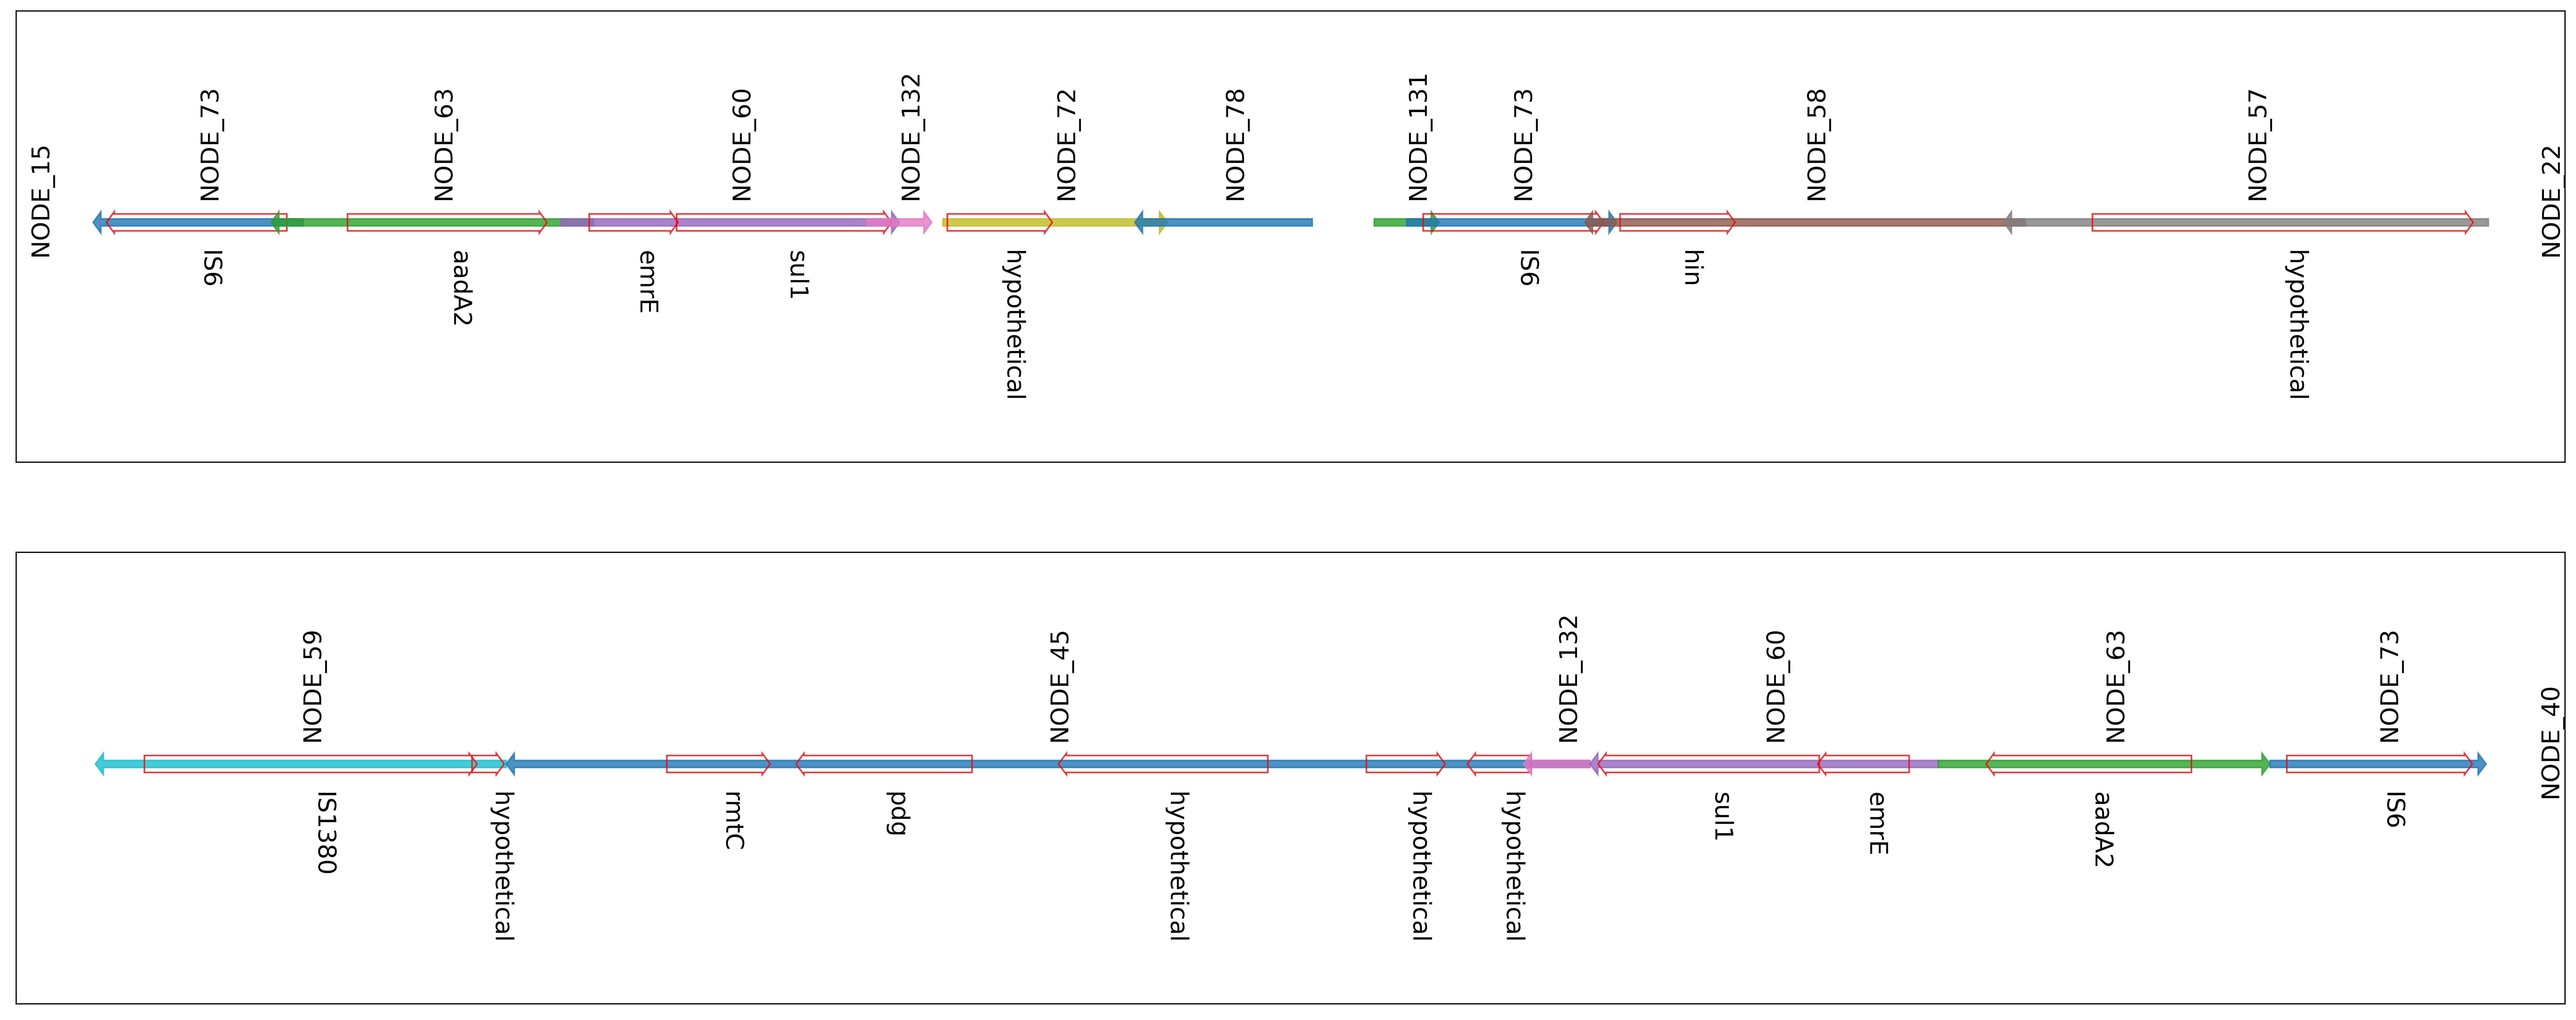

In [7]:
left, right = 10000000, 0
color_map = {}
tt = len(colors)


fig, axes = plt.subplots(nrows=2,figsize=(30,12))
axs = axes[0]

for sam in pos_info.split('\n'):
    if sam.startswith('#'):
        continue
    toks = sam.split()
    if len(toks) < 6:
        continue
    start = int(toks[3])
    length = int(toks[0].partition('_length_')[2].partition('_cov_')[0]) 
    name = toks[0]
    end = start + length
    if start < left:
        left = start 
    if end > right:
        right = end    
    node_name = sam.partition('_length_')[0]
    if node_name in color_map:
        color = color_map[node_name]
    else:
        tt += 1
        if tt >= len(colors):
            tt = 0
        color = colors[tt]
        color_map[node_name] = color
    
    if flag_positive(int(toks[1])):
        start,end = end,start
        length = - length
    #g = mpatches.Arrow(start,5,length,0,2, color=color, alpha=0.8)
    #axs.add_patch(g)    
    #axs.arrow(start, 5, length, 0, width=0.5, color=color, alpha=0.8,length_includes_head=True, head_width=1.5, head_length=30)
    plot_contig(axs, name, start, length, color)
    
    axs.annotate(node_name, ((start + end)/2, 7),rotation=90)
    tt += 1
    #break
left = left - 300
right = right + 300

axs.annotate('NODE_15', (left + 50,  3),rotation=90)
axs.annotate('NODE_22', (right - 100,  3),rotation=90)
axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)


axs.set(xlim=(left, right), ylim=(-12, 20))


axs = axes[1]
left, right = 10000000, 0
for sam in pos_info2.split('\n'):
    if sam.startswith('#'):
        continue
    toks = sam.split()
    if len(toks) < 6:
        continue
    start = int(toks[3])
    length = int(toks[0].partition('_length_')[2].partition('_cov_')[0]) 
    name = toks[0]
    end = start + length
    if start < left:
        left = start 
    if end > right:
        right = end    
    node_name = sam.partition('_length_')[0]
    if node_name in color_map:
        color = color_map[node_name]
    else:
        tt += 1
        if tt >= len(colors):
            tt = 0
        color = colors[tt]
        color_map[node_name] = color
    
    if flag_positive(int(toks[1])):
        start,end = end,start
        length = - length
    #g = mpatches.Arrow(start,5,length,0,2, color=color, alpha=0.8)
    #axs.add_patch(g)    
    #axs.arrow(start, 5, length, 0, width=0.5, color=color, alpha=0.8,length_includes_head=True, head_width=1.5, head_length=30)
    
    plot_contig(axs, name, start, length, color)    
    
    axs.annotate(node_name, ((start + end)/2, 7),rotation=90)
    tt += 1
    #break

left = left - 300
right = right + 300

#axs.annotate('NODE_15', (left + 50,  3),rotation=90)
axs.annotate('NODE_40', (right - 100,  3),rotation=90)
    
axs.set(xlim=(left, right), ylim=(-12, 20))
axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)